In [317]:
import requests
import pandas as pd
from matplotlib.pyplot import plot
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_distribution_of_wealth'
html = requests.get(url).content
df_list = pd.read_html(html)
wea = df_list[1] #[-1]

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
html = requests.get(url).content
df_list = pd.read_html(html)
imf = df_list[2]
imf.name = 'imf'
wb = df_list[3] 
wb.name='wb'

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_percentage_of_population_living_in_poverty'
html = requests.get(url).content
df_list = pd.read_html(html)
pov = df_list[0]

def rem(lista):
    return [x.split('%')[0] for x in lista]
#display(wea.head(7))

In [359]:
wea.columns = wea.iloc[0]
wea1 = wea.drop(index =0)
wea1.dropna(inplace=True)
wea1.index = wea1.Country
wea1 = wea1.drop(['Country','Share of world population (%)', 'Share of adult population (%)'], axis=1)
del wea1.index.name

pov.columns = pov.iloc[0]
pov1 = pov.drop(index =0)
pov1.dropna(inplace=True)
pov1.index = pov1.Country
pov1 = pov1.drop(['Country','Continent','Year'], axis=1)
pov1 = pov1.apply(rem, axis=0)

del pov1.index.name


def fix(df_list):
    new = []
    for df in df_list:
        name = df.name
        df.columns = df.iloc[0]
        df.index = df['Country/Territory']
        df =  df.drop(['Country/Territory','Rank'], axis=1)
        df.drop(['Country/Territory'], axis= 0, inplace=True)
        del df.index.name
        ind = df.index
        col = df['Int$']
        col.name = 'gdp_'+ name
        df = pd.DataFrame(col, index= ind)
        new.append(df)
    return new

[wb1, imf1] = fix([wb,imf])

In [360]:
wea1 = wea1.astype('float')
imf1 = imf1.astype('float')
wb1 = wb1.astype('float')
pov1 = pov1.astype('float')

imf1['gdp_imf'] = imf1['gdp_imf']/10000
wb1['gdp_wb'] = wb1['gdp_wb']/10000
                
#wea1.sort_values(['Wealth per capita'], ascending = False,inplace=True)
imf1.sort_values(['gdp_imf'],ascending = False,inplace=True)
wb1.sort_values(['gdp_wb'],ascending = False,inplace=True)

In [365]:
wea_pov = pd.concat([imf1,pov1], axis=1, join= 'inner')
wea_pov = wea_pov.sort_values('gdp_imf', ascending=False)
wea_pov =  wea_pov.iloc[:50]
wea_pov.sort_index(ascending=True, inplace=True)
#wea_pov = wea_pov.sort_values('< $5.50[6]', ascending=False)
wea_pov.reset_index(inplace=True)
wea_pov.head(10)

,index,gdp_imf,< $1.90[4],< $3.20[5],< $5.50[6]
0,Argentina,2.0677,0.6,2.4,7.8
1,Australia,4.9882,0.3,0.7,0.7
2,Austria,4.9247,0.7,0.7,0.9
3,Belgium,4.6301,0.0,0.2,0.2
4,Bulgaria,2.1578,1.5,3.7,8.7
5,Canada,4.8141,0.3,0.7,1.0
6,Chile,2.4588,1.3,3.1,10.1
7,Croatia,2.4095,0.7,1.5,5.8
8,Cyprus,3.6557,0.0,0.0,0.2
9,Czech Republic,3.5223,0.0,0.0,0.4


In [391]:
np.full((len(wea_pov)), 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

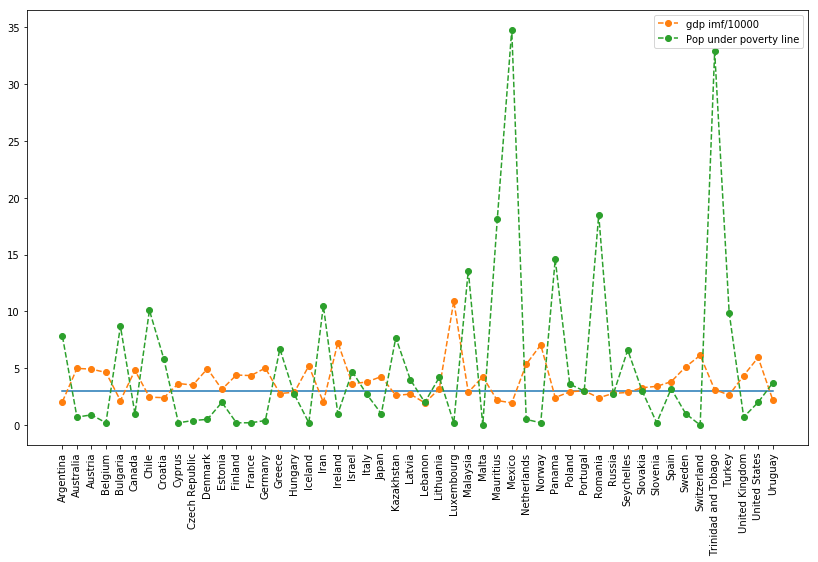

In [394]:
import matplotlib.pyplot as plt
import numpy as np

y1 = list(wea_pov['gdp_imf'].values.astype('float'))
y3 = wea_pov['< $5.50[6]']
y0 = np.full((len(wea_pov)), 3).tolist()
#print(y0)
#print(y1)
x = list(wea_pov['index'])


fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x, y0)
ax.plot(x, y1, '--o',  label="gdp imf/10000")
ax.plot(x, y3, '--o',  label="Pop under poverty line")
plt.xticks(rotation=90)
ax.legend()

plt.show()

In [314]:
wea_gdp = pd.concat([wea1, imf1, wb1], axis=1, join='inner')
wea_gdp.drop(['Int$'], axis=1, inplace=True)
#wea_gdp.sort_values(['Wealth per capita'], ascending=False, inplace=True)
wea_gdp = wea_gdp.sort_values('gdp_imf', ascending=False)
wea_gdp =  wea_gdp.iloc[:40]
wea_gdp.sort_index(ascending=True, inplace=True)
wea_gdp = wea_gdp.sort_values('gdp_imf', ascending=False)
wea_gdp.reset_index(inplace=True)
wea_gdp.head(10)

,index,Population (1000s),Adults (1000s),Wealth per capita,Wealth per adult,Share of world wealth (%),GDP per capita,Share of world GDP (%),Wealth Gini,gdp_imf,gdp_wb
0,Macau,444.0,310.0,71660.0,102755.0,0.02,23118.0,0.02,0.580,1.14430,1.15123
1,Luxembourg,435.0,328.0,185231.0,245479.0,0.05,48968.0,0.05,0.650,1.09192,1.03662
2,Singapore,4017.0,2890.0,113632.0,157942.0,0.28,28644.0,0.25,0.689,0.90531,0.93905
3,Ireland,4700.0,2646.0,91432.0,131367.0,0.22,27197.0,0.22,0.581,0.72632,0.76305
4,Norway,4502.0,3337.0,79292.0,106970.0,0.22,32057.0,0.31,0.633,0.70590,0.60978
5,Switzerland,7167.0,5497.0,137549.0,179345.0,0.61,28209.0,0.43,0.803,0.61360,0.65006
6,Hong Kong,6637.0,5085.0,188699.0,246307.0,0.78,27893.0,0.40,0.740,0.61016,0.61540
7,United States,284154.0,202865.0,143727.0,201319.0,25.40,35619.0,21.67,0.801,0.59495,0.59532
8,Saudi Arabia,21484.0,10992.0,22025.0,43046.0,0.29,12374.0,0.57,0.737,0.55263,0.53845
9,Netherlands,15898.0,12046.0,121165.0,159910.0,1.20,25759.0,0.88,0.650,0.53582,0.52941


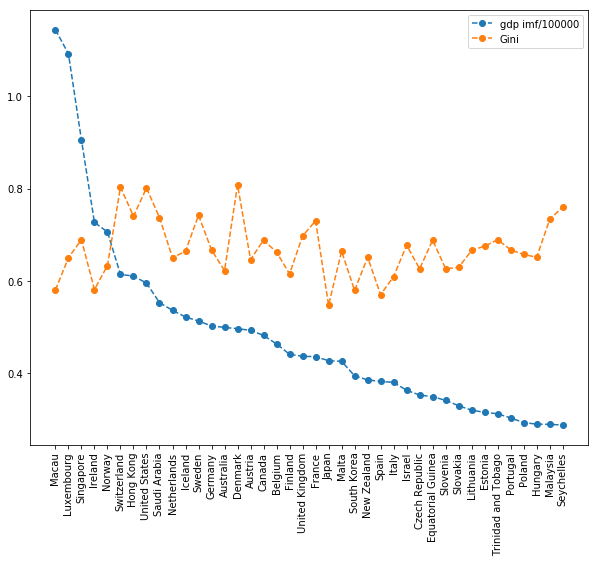

In [316]:
import matplotlib.pyplot as plt

x1 = list(wea_gdp['gdp_imf'].values.astype('float'))
x2 = list(wea_gdp['gdp_wb'].values.astype('float'))
x3 = wea_gdp['Wealth Gini']

y = list(wea_gdp['index'])


#fig, axs = plt.subplots(1, 3, figsize=(10,8), sharey=True)
#axs[0].bar(y, x)
#axs[1].scatter(y, x)
#axs[2].plot(y, x)
#fig.suptitle('Categorical Plotting')


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(y, x1, '--o',  label="gdp imf/100000")
#ax.plot(y, x2, '--o',  label="gdp wb/100000")
ax.plot(y, x3, '--o',  label="Gini")
plt.xticks(rotation=90)
#ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

In [261]:
list(wea_gdp['gdp_imf']).astype('int')

AttributeError: 'list' object has no attribute 'astype'